# Import Libraries

In [182]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import (
    LinearRegression
)

from sklearn.datasets import make_regression

# Data

In [183]:
d1_x, d1_y = make_regression(n_samples=200, n_features=1, 
                       n_informative=1, n_targets=1,noise=30.,random_state=42)

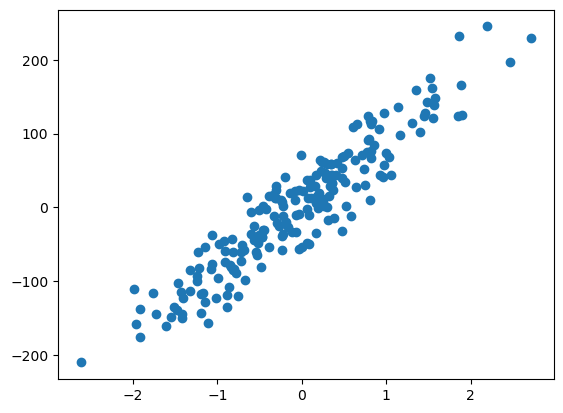

In [184]:
plt.scatter(d1_x,d1_y)
plt.show()

In [185]:
d2_x, d2_y = make_regression(n_samples=1000, n_features=2, 
                       n_informative=2, n_targets=1,noise=50.,random_state=42)

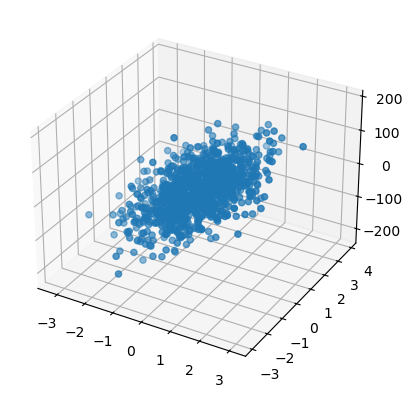

In [186]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d2_x[:,0], d2_x[:,1], d2_y);

# Simple Linear Regression

In [187]:
class SLR:

    # simple linear regression
    # closed form solution

    def __init__(self):
        pass


    def fit(self,x_train,y_train):


        x_bar = x_train.mean()
        y_bar = y_train.mean()

        m_num = np.sum((x_train.ravel() - x_bar) * (y_train - y_bar))
        m_den = np.sum(np.square(x_train.ravel() - x_bar))

        self.coef = m_num / m_den

        self.intercept = y_bar - self.coef * x_bar


    def predict(self,x_test):

        return self.coef * x_test.ravel() + self.intercept

In [188]:
my_slr = SLR()
my_slr.fit(d1_x,d1_y)

In [189]:
m = my_slr.coef

In [190]:
b = my_slr.intercept

In [191]:
print(f'slope: {m:.3f}\nintercept: {b:.3f}')

slope: 86.625
intercept: 4.286


In [192]:
lr1 = LinearRegression()
lr1.fit(d1_x,d1_y)

LinearRegression()

In [193]:
lr1.coef_

array([86.62464521])

In [194]:
lr1.intercept_

4.2855417030635685

# Multiple Linear Regression

In [195]:
class MLR:

    # multiple linear regression
    # closed form solution

    def __init__(self):
        pass

    def fit(self,x_train,y_train):

        design_matrix = np.hstack((np.ones(x_train.shape[0]).reshape(-1,1),x_train.copy()))
        target = y_train.copy()

        weights = np.linalg.inv(design_matrix.T.dot(design_matrix)).dot(design_matrix.T).dot(target)

        self.intercept = weights[0]
        self.coef = weights[1:]

    def predict(self,x_test):

        return np.sum(self.coef * x_test, axis=1) + self.intercept

In [196]:
my_mlr = MLR()
my_mlr.fit(d1_x,d1_y)

In [197]:
my_mlr.coef

array([86.62464521])

In [198]:
my_mlr.intercept

4.28554170306357

In [199]:
my_mlr2 = MLR()
my_mlr2.fit(d2_x,d2_y)

In [200]:
my_mlr2.intercept

0.07843864316183696

In [201]:
my_mlr2.coef

array([42.50324429,  7.59003055])

In [202]:
lr2 = LinearRegression()
lr2.fit(d2_x,d2_y)

LinearRegression()

In [203]:
lr2.intercept_

0.0784386431618378

In [204]:
lr2.coef_

array([42.50324429,  7.59003055])